# Sentiment Analysis

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} textblob

Solving environment: done

# All requested packages already installed.



In [2]:
from textblob import TextBlob

TextBlob("Imagine there's no heaven. it's easy if you try").sentiment

Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)

In [3]:
TextBlob("Too late, my time has come").sentiment

Sentiment(polarity=-0.3, subjectivity=0.6)

In [4]:
TextBlob("NiCE WORK").sentiment

Sentiment(polarity=0.6, subjectivity=1.0)

In [5]:
# Read in the document-term matrix
import pandas as pd

data_df = pd.read_csv("lyrics.csv",index_col=0)
data_df

,lyrics
ABBA,"[Verse 1] I, I've been in love before I though..."
David_Bowie,[Intro] [Verse 1] A small Jean Genie snuck of...
Janis_Joplin,"[Intro] Oh, come on, come on, come on, come on..."
Michael_Jackson,"[Verse 1] Your butt is mine, gonna tell you ri..."
Queen,[Verse 1] I can dim the lights and sing you so...
Rolling_Stones,[Intro] What a drag it is getting old [Verse ...
The_Clash,Stay around don't play around This old town an...
Bob_Dylan,[Verse 1] Go away from my window Leave at your...
Elton_John,[Verse 1] Can you hear it in the distance? Can...
Led_Zeppeling,[Intro] Hey That's right [Verse 1] Asked swee...


In [6]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_df['polarity'] = data_df['lyrics'].apply(pol)
data_df['subjectivity'] = data_df['lyrics'].apply(sub)
data_df

,lyrics,polarity,subjectivity
ABBA,"[Verse 1] I, I've been in love before I though...",0.115758,0.514527
David_Bowie,[Intro] [Verse 1] A small Jean Genie snuck of...,0.072549,0.474987
Janis_Joplin,"[Intro] Oh, come on, come on, come on, come on...",0.216069,0.516952
Michael_Jackson,"[Verse 1] Your butt is mine, gonna tell you ri...",0.128611,0.509167
Queen,[Verse 1] I can dim the lights and sing you so...,0.134477,0.540202
Rolling_Stones,[Intro] What a drag it is getting old [Verse ...,0.044148,0.514998
The_Clash,Stay around don't play around This old town an...,0.053042,0.438404
Bob_Dylan,[Verse 1] Go away from my window Leave at your...,0.055089,0.468441
Elton_John,[Verse 1] Can you hear it in the distance? Can...,0.110339,0.486626
Led_Zeppeling,[Intro] Hey That's right [Verse 1] Asked swee...,0.153027,0.518535


In [7]:
data_df.index

Index(['ABBA', 'David_Bowie', 'Janis_Joplin', 'Michael_Jackson', 'Queen',
       'Rolling_Stones', 'The_Clash', 'Bob_Dylan', 'Elton_John',
       'Led_Zeppeling', 'Pink_Floyd', 'Ramones', 'The_Beatles', 'The_Doors'],
      dtype='object')

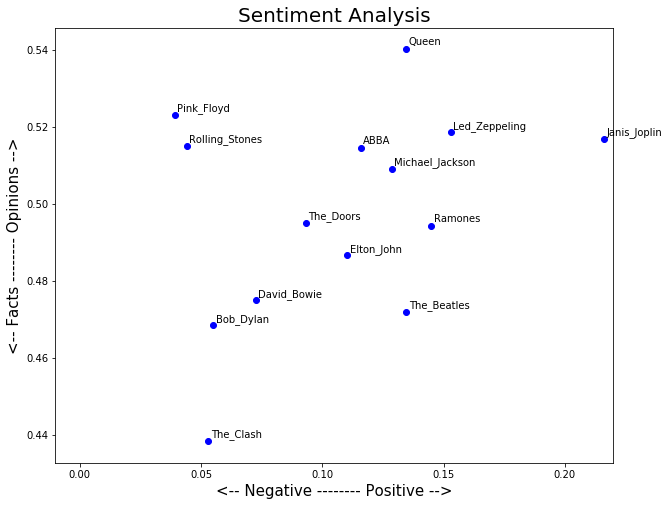

In [8]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, artist in enumerate(data_df.index):
    x = data_df.polarity.loc[artist]
    y = data_df.subjectivity.loc[artist]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_df.index[index], fontsize=10)
    plt.xlim(-.01, .22) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()